# Primitives
- ### Primitives are core functions that make it easier to build modular algorithms and applications. 
    - #### **Sampler:** Generates quasi-probability distribution from input circuits.
    - #### **Estimator:** Calculates expectation values from input circuits and observables.

![primitive photo](primitives.png)

# Build a Bell State and Learn to Use `Sampler`

In [1]:
from qiskit import QuantumCircuit

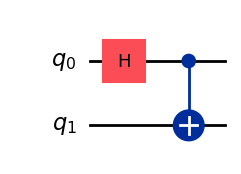

In [2]:
bell_circuit = QuantumCircuit(2)
bell_circuit.h(0)
bell_circuit.cx(0,1)
bell_circuit.draw('mpl')

## Adding Measurment Operator to our Circuit
- #### When a quantum state is measured, a qubit is projected in the computational ( Pauli Z - $\sigma_z$ ) basis to either $|0\rangle$ or $|1\rangle$.
- #### The classical bit `cbit` indicates the result of that projection as a `0` or a `1` respectively.

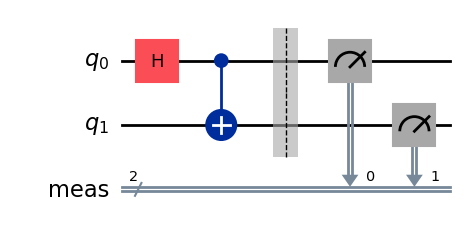

In [3]:
bell_circ_m = QuantumCircuit(2)
bell_circ_m.h(0)
bell_circ_m.cx(0,1)
bell_circ_m.measure_all()
bell_circ_m.draw('mpl')

## Initialize a `Sampler` Class and invoke it to get Result

In [4]:
# Importing StatevectorSampler: This can do full state vector simulation
from qiskit.primitives import StatevectorSampler as Sampler

In [5]:
# Initialization of the sampler
sampler = Sampler()

In [7]:
# Run and extract meaurement result
pub = (bell_circ_m,)                      # PUB: Primitive Unified Blocs: Details at the end.
job = sampler.run([pub], shots= 1024)
job_result = job.result()

# Printing the result object
print(job_result)

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


In [8]:
job_result[0]

SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})

In [9]:
result = job_result[0]

## Extracting Measurement Counts

In [ ]:
counts = result.data.meas.get_counts()
print(counts)

## Extracting Individual Shot Result

In [ ]:
bit_strings = result.data.meas.get_bitstrings()
print(bit_strings)

## Plot Probability Distribution

In [12]:
from qiskit.visualization import plot_distribution

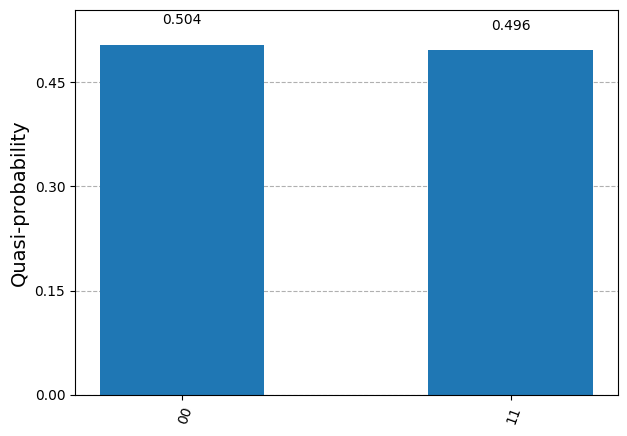

In [13]:
plot_distribution(counts)

# Learn to Use `Estimator`

## Let's find the expectation value of an `operator` with respect to a given `state`

## State: $$ |\phi^+\rangle = \frac{1}{\sqrt{2}}\Big[|00\rangle + |11\rangle\Big]$$

## Observable: $$ H = 4 XX + 3 YX +5 ZI  = 4 \sigma_x\sigma_x + 3 \sigma_y\sigma_x +5 \sigma_z\sigma_o $$

## To Evaluate: $$\langle\phi^+|H|\phi^+\rangle $$

In [14]:
from qiskit.quantum_info import SparsePauliOp

In [15]:
# Defining an operator
operator = SparsePauliOp(["XX", "YX", "ZI"], [4 , 3 , 5])
print(operator)

SparsePauliOp(['XX', 'YX', 'ZI'],
              coeffs=[4.+0.j, 3.+0.j, 5.+0.j])


In [16]:
print(operator.to_matrix())

[[ 5.+0.j  0.+0.j  0.+0.j  4.-3.j]
 [ 0.+0.j  5.+0.j  4.-3.j  0.+0.j]
 [ 0.+0.j  4.+3.j -5.+0.j  0.+0.j]
 [ 4.+3.j  0.+0.j  0.+0.j -5.+0.j]]


In [17]:
from qiskit.primitives import StatevectorEstimator as Estimator

In [18]:
# Initialization of the Estimator
estimator = Estimator()

In [34]:
# Run and extract meaurement result
pub = (bell_circuit, operator)                    # PUB: Primitive Unified Blocs: Details at the end.
job_2 = estimator.run([pub], precision= 0.001)
job_result_2 = job.result()

# Printing the result object
print(job_result_2)

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.ndarray(<shape=(), dtype=float64>)), metadata={'target_precision': 0.0, 'circuit_metadata': {}})], metadata={'version': 2})


In [35]:
job_result_2[0]

PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.ndarray(<shape=(), dtype=float64>)), metadata={'target_precision': 0.0, 'circuit_metadata': {}})

In [36]:
result_2 = job_result_2[0]

In [37]:
print(f'Expectation Value: {result_2.data.evs}')
print(f'Standard Deviation: {result_2.data.stds}')


Expectation Value: 3.999999999999999
Standard Deviation: 0.0


# PUB: Primitive Unified Blocs
## For `Sampler`
`pub = (circuit [required],parameter_values [optional],shots [optional]) `
### Valid Formats
1. (parametric_circuit, parameter_values, shots)
2. (parametric_circuit, parameter_values)
3. (non_parametric_circuit, None, shots)
4. (non_parametric_circuit, )
## For `Estimator`

`pub = (circuit [required],observables [required],parameter_values [optional], precision [optional],)`
### Valid Formats
1. (parametric_circuit, observables, parameter_values, precision)
2. (parametric_circuit, observables, parameter_values)
3. (non_parametric_circuit, observables, None, precision)
4. (non_parametric_circuit, observables)